In [35]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [32]:
dfds=pd.read_csv('/Users/michaelpalmer/galvanize/level-up/ds_30.csv', sep='|')

In [3]:
from clean_salaries import filter_jobs_with_salaries, create_salaries_cols

In [4]:
dfds.drop(columns='Unnamed: 0', inplace=True)

In [5]:
dfds.head()

,job_title,job_description,stars,salary_range
0,Senior Data Scientist or Data Scientist,Senior Data Scientist or Data Scientist #88345...,3.1 ★,$120K-$170K (Glassdoor Est.)
1,Data Scientist - Risk,Postmates runs one of the largest marketplaces...,2.9 ★,$90K-$127K (Glassdoor Est.)
2,Data Scientist,Data Scientist\nAdColony is on a mission to ma...,2.2 ★,$120K-$169K (Glassdoor Est.)
3,Data Scientist,Smartsheet is looking for an experienced Data ...,4.6 ★,$108K-$155K (Glassdoor Est.)
4,Data Scientist,Data Scientist\n\n27-Jul-2018\n\nPosition Summ...,4.3 ★,$118K-$173K (Glassdoor Est.)


In [27]:
dfclean = filter_jobs_with_salaries(dfds,'salary_range')
dfclean = create_salaries_cols(dfclean,'salary_range')
dfclean.reset_index(inplace=True, drop=True)

/Users/michaelpalmer/galvanize/level-up/src/clean_salaries.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  tempdf[salary_col] = tempdf[salary_col].str.lower()


In [8]:
dfclean.head()

,job_title,job_description,stars,salary_lower,salary_upper,salary_estimator
0,Senior Data Scientist or Data Scientist,Senior Data Scientist or Data Scientist #88345...,3.1 ★,120,170,(glassdoor est.)
1,Data Scientist - Risk,Postmates runs one of the largest marketplaces...,2.9 ★,90,127,(glassdoor est.)
2,Data Scientist,Data Scientist\nAdColony is on a mission to ma...,2.2 ★,120,169,(glassdoor est.)
3,Data Scientist,Smartsheet is looking for an experienced Data ...,4.6 ★,108,155,(glassdoor est.)
4,Data Scientist,Data Scientist\n\n27-Jul-2018\n\nPosition Summ...,4.3 ★,118,173,(glassdoor est.)


In [14]:
skills_vector = ['machine learning', 'python', 'java', 'hadoop', 'spark', 'data mining', 'r', 'c++', 'hive',
                'pig', 'sql', 'natural language processing', 'ai', 'nosql', 'image processing', 'tableau', 
                 'sas', 'matlab', 'embedded software', 'spss', 'oop', 'azure', 'javascript', 'sdlc', '.net', 
                 'perl', 'rest', 'big data', 'jenkins', 'oracle', 'management experience', 's3', 'jira', 
                 'json', 'shell scripting', 'test automation', 'clojure', 'data science', 'go', 'biotechnology',
                 'ci', 'project management', 'excel', 'microsoft office', 'docker', 'data analysis', 'postgresql',
                 'ruby', 'laboratory experience', 'kubernetes', 'microsoft powerpoint', 'program management',
                 'd3.js', 'git', 'data warehouse', 'html5', 'microsoft sql server', 'hbase', 'ansible', 
                 'google cloud platform', 'unit testing', 'node.js', 'php', 'react', 'marketing', 'spring',
                 'maven', 'signal processing', 'power bi', 'mysql', 'scripting', 'svn', 'angular', 
                 'time management', 'analysis skills', 'visual basic', 'kafka', 'molecular biology','dynamodb',
                 'system design', 'weka', 'leadership experience', 'sentiment analytics', 'mirosoft word', 'sap',
                 'software development', 'clinical research', 'mongodb', 'predictive analytics', 
                 'statistical analytics', 'genetics', 'cloud computing', 'visual studio', 'cassandra', 
                 'supply chain experience', 'erp systems']
skeelz=set(skills_vector)

In [29]:
cvec=CountVectorizer(stop_words='english', vocabulary=skeelz, token_pattern = r"(?u)\b\w+\b")
cvec.fit(dfclean['job_description'])
bag_of_words=cvec.transform(dfclean['job_description'])
sum_words = bag_of_words.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in     cvec.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
#return words_freq[:n]

In [334]:
sum_words

matrix([[  0, 128,   0,   1,   2, 119,   0,   7,   0,  21,  11,   0,   2,
           0,   0,   0,   0,   0,   0,  11,   8,   0,   0,  97,  46,  18,
           0,   0, 203,  27, 103,   0,   0, 152,  32,   6,   3,  14,  40,
           7,   0,   0,   0,   0, 300,  64,   4,   0,   0,   0,   0,   0,
          17,  21,   0,   0,  64,   1,  78,  54,  10,  46,  10,   0,   0,
           0,   0, 407, 305,   8,  20,  29,  52,  81,  76, 114,   8,   0,
           0,   0,   0, 181,   3,  19, 425,   0,   0,   4,   0, 149,   0,
           0,   0,   0,   0,   7]], dtype=int64)

Text(0.5,1,'Term Frequency in Data Science Job Postings')

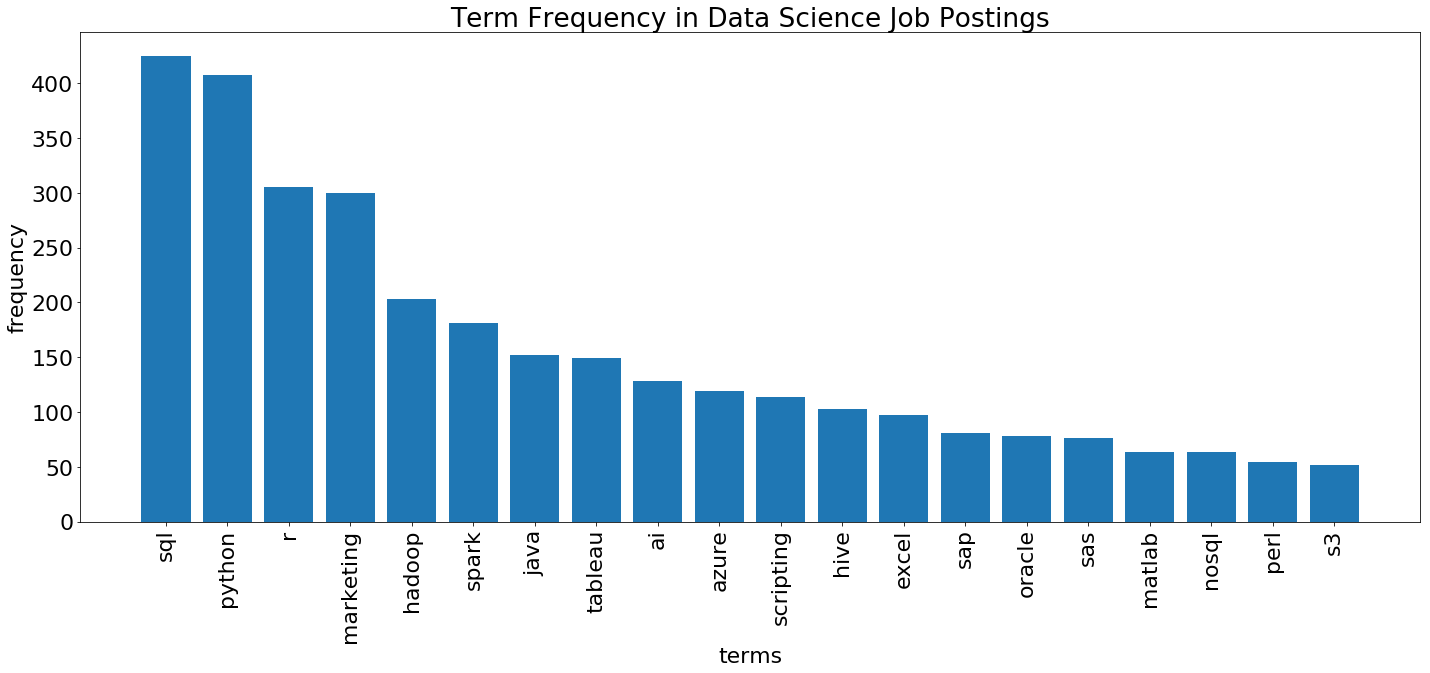

In [37]:
from matplotlib import rcParams
rcParams.update({'font.size': 22})
arr=np.array(words_freq[:20])
X=arr[:,0]
y=arr[:,1]
y=y.astype(int)
fig, ax = plt.subplots(figsize=(24,9))
ax.bar(X,y)
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
ax.set_xlabel('terms')
ax.set_ylabel('frequency')
ax.set_title('Term Frequency in Data Science Job Postings')

In [24]:
sum_words

matrix([[  0, 128,   0,   1,   2, 119,   0,   7,   0,  21,  11,   0,   2,
           0,   0,   0,   0,   0,   0,  11,   8,   0,   0,  97,  46,  18,
           0,   0, 203,  27, 103,   0,   0, 152,  32,   6,   3,  14,  40,
           7,   0,   0,   0,   0, 300,  64,   4,   0,   0,   0,   0,   0,
          17,  21,   0,   0,  64,   1,  78,  54,  10,  46,  10,   0,   0,
           0,   0, 407, 305,   8,  20,  29,  52,  81,  76, 114,   8,   0,
           0,   0,   0, 181,   3,  19, 425,   0,   0,   4,   0, 149,   0,
           0,   0,   0,   0,   7]], dtype=int64)

In [38]:
from sklearn.decomposition import NMF

In [141]:
X = np.array([[1, 0], [2, 0], [3, 1.2], [4, 0], [5, 0.8], [6, 1]])
model = NMF(n_components=2, init='nndsvda', random_state=0)
W = model.fit_transform(X)
H = model.components_

In [142]:
W

array([[0.        , 0.3560461 ],
       [0.        , 0.71209221],
       [1.58441811, 0.        ],
       [0.        , 1.42418441],
       [1.05867752, 1.06637886],
       [1.32341029, 1.2439193 ]])

In [143]:
X

array([[1. , 0. ],
       [2. , 0. ],
       [3. , 1.2],
       [4. , 0. ],
       [5. , 0.8],
       [6. , 1. ]])

In [144]:
W@H

array([[1.00003254, 0.        ],
       [2.00006508, 0.        ],
       [3.0003192 , 1.19853046],
       [4.00013016, 0.        ],
       [4.99991105, 0.80083485],
       [5.99988066, 1.00109152]])

In [139]:
model.inverse_transform(W)

array([[9.99992404e-01, 8.58917065e-05],
       [1.99998481e+00, 1.71783413e-04],
       [2.99989897e+00, 1.20017866e+00],
       [3.99996962e+00, 3.43566826e-04],
       [5.00006454e+00, 7.99885874e-01],
       [6.00006968e+00, 9.99876778e-01]])

In [25]:
count_vect_df = pd.DataFrame(bag_of_words.todense(), columns=cvec.get_feature_names())

In [333]:
bag_of_words

<609x96 sparse matrix of type '<class 'numpy.int64'>'
	with 2566 stored elements in Compressed Sparse Row format>

In [67]:
bigdf = pd.concat([dfclean, count_vect_df], axis=1)

In [68]:
cols = cvec.get_feature_names()

In [66]:
dfclean.columns

Index(['job_title', 'job_description', 'stars', 'salary_lower', 'salary_upper',
       'salary_estimator'],
      dtype='object')

In [219]:
X = bigdf[cols]

In [181]:
n=len(cols)
#init methods ‘random’ | ‘nndsvd’ | ‘nndsvda’ | ‘nndsvdar’ | ‘custom’
model = NMF(init='nndsvd', random_state=0)
W = model.fit_transform(X)
H = model.components_

In [182]:
np.array(X.sum(axis=0))

array([  0, 128,   0,   1,   2, 119,   0,   7,   0,  21,  11,   0,   2,
         0,   0,   0,   0,   0,   0,  11,   8,   0,   0,  97,  46,  18,
         0,   0, 203,  27, 103,   0,   0, 152,  32,   6,   3,  14,  40,
         7,   0,   0,   0,   0, 300,  64,   4,   0,   0,   0,   0,   0,
        17,  21,   0,   0,  64,   1,  78,  54,  10,  46,  10,   0,   0,
         0,   0, 407, 305,   8,  20,  29,  52,  81,  76, 114,   8,   0,
         0,   0,   0, 181,   3,  19, 425,   0,   0,   4,   0, 149,   0,
         0,   0,   0,   0,   7])

In [183]:
(W@H).sum(axis=0)

array([  0.        , 128.00000725,   0.        ,   3.46132143,
         2.82107735, 119.01657855,   0.        ,   7.00016308,
         0.        ,  21.02378037,  11.00682282,   0.        ,
         1.69449251,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,  11.87235652,
         8.09393648,   0.        ,   0.        ,  97.02093092,
        46.03995255,  18.17068267,   0.        ,   0.        ,
       203.02066044,  27.03946239, 103.00309655,   0.        ,
         0.        , 152.00194173,  32.10815338,   6.6890008 ,
         7.59443476,  14.00045269,  40.00037532,   8.60982175,
         0.        ,   0.        ,   0.        ,   0.        ,
       300.00120419,  64.02754124,   5.70160456,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
        17.01654227,  21.15674089,   0.        ,   0.        ,
        64.00396729,   2.59192662,  78.00007022,  54.00664419,
        10.00008365,  46.00024615,  10.00005661,   0.  

In [77]:
from sklearn.ensemble import RandomForestRegressor

In [88]:
X.iloc[0,:].argmax()

/Users/michaelpalmer/anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  """Entry point for launching an IPython kernel.


'excel'

In [114]:
W.argmax()

56644

In [116]:
np.unravel_index(W.argmax(),W.shape)

(590, 4)

In [104]:
X.columns.get_loc("excel")

23

In [98]:
X.get_loc()

AttributeError: 'DataFrame' object has no attribute 'get_loc'

In [72]:
model.inverse_transform(W)[0]

array([0.00000000e+00, 4.61613218e-18, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.73248108e-24,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 9.99999700e-01,
       5.22910748e-11, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       4.60278934e-10, 0.00000000e+00, 6.02409271e-10, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 7.65069564e-07, 0.00000000e+00,
       4.22104746e-07, 7.18024301e-08, 2.27214086e-20, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       5.68049126e-06, 1.00754438e-14, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

### Use Singular Value Decomposition to fill in zero values

In [197]:
from numpy.linalg import svd, eig

In [220]:
U, sigma, VT = svd(X)

In [278]:
sigma_reduced = np.zeros(X.shape)
np.fill_diagonal(sigma_reduced,sigma)
#20 latent features
sigma_reduced[:,20:] = 0

#Reconstruct ratings matrix
ratings_reconstructed = np.dot(np.dot(U,sigma_reduced),VT)


In [234]:
ratings_reconstructed

array([ 8.69125441e-16,  1.27719690e+02, -9.26220448e-15,  7.67544045e-01,
        9.51395567e-01,  1.19051074e+02,  2.45145312e-14,  3.17480762e+00,
       -1.57467446e-14,  2.14141040e+01,  1.25328556e+01,  4.15301215e-15,
        8.23253115e-01, -6.75418431e-16, -6.67259852e-15,  2.66340565e-15,
       -1.68728363e-15,  1.92751668e-15, -6.09321488e-15,  7.22226674e+00,
        5.37558594e+00, -1.77144032e-15,  6.26557194e-15,  9.59126674e+01,
        4.75328917e+01,  1.44919231e+01, -1.10416767e-15,  9.09270404e-17,
        2.02319727e+02,  2.60125782e+01,  1.03866119e+02,  2.81731703e-16,
        1.31215341e-17,  1.51024678e+02,  3.63120275e+01,  6.83453633e+00,
        4.05250399e+00,  1.50537538e+01,  3.85217828e+01,  4.83183890e+00,
        1.49435560e-22,  3.94446950e-25, -5.59504141e-25, -3.12221912e-30,
        3.00162123e+02,  5.42385278e+01,  2.58748637e+00,  1.33182364e-30,
       -5.84151717e-31,  9.13067346e-33, -5.13326832e-32, -7.97856878e-33,
        2.01853370e+01,  

In [237]:
y=dfclean['salary_upper']

In [238]:
from sklearn.ensemble import RandomForestRegressor

In [239]:
regr = RandomForestRegressor(n_estimators=1000)

In [241]:
from sklearn.model_selection import KFold

In [242]:
kf = KFold(n_splits=10, shuffle=False, random_state=None)

In [259]:
X_arr = X.values
y_arr = y.values

In [256]:
kf.split(X_arr)

<generator object _BaseKFold.split at 0x10d0be4c0>

In [266]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

In [275]:
errors_test=[]
errors_train=[]
for train_index, test_index in kf.split(X_arr):
    X_train, X_test = X_arr[train_index], X_arr[test_index]
    y_train, y_test = y_arr[train_index], y_arr[test_index]
    regr.fit(X_train,y_train)
    y_pred = regr.predict(X_test)
    y_train_pred = regr.predict(X_train)
    rms_test = np.sqrt(mean_squared_error(y_test, y_pred))
    rms_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    errors_test.append(rms_test)
    errors_train.append(rms_train)

No handles with labels found to put in legend.


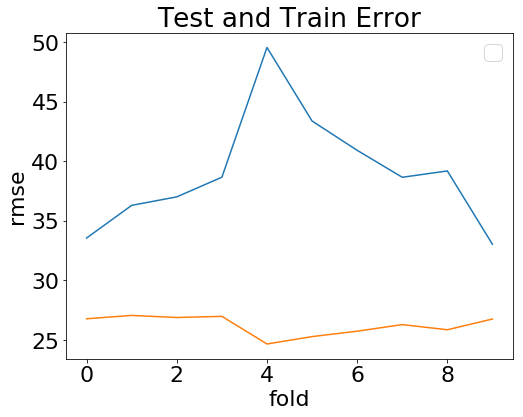

In [284]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(errors_test)
ax.plot(errors_train)
ax.set_xlabel('fold')
ax.set_ylabel('rmse')
ax.set_title('Test and Train Error')
ax.legend(loc='best')

### NMF approach


NMF feels like a better tool for the job in conjunction with a nonnegative regression. 
Want all coefficients to be positive, and those coefficients to be interpretable. For example, if a new feature is present, we always want that to correlate with a higher salary. It should never hurt you to be more skilled in something.

In [320]:
model = NMF(n_components=50, init='nndsvda', random_state=0)
W = model.fit_transform(X)
H = model.components_
W@H

array([[0.00000000e+00, 9.06786122e-07, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 2.70568709e-08],
       [0.00000000e+00, 7.33401381e-08, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.63928004e-13],
       [0.00000000e+00, 3.41167483e-06, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 2.45652461e-05],
       ...,
       [0.00000000e+00, 3.52711116e-06, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 3.48228495e-07],
       [0.00000000e+00, 2.00276372e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 6.44887200e-06, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 4.68982153e-04]])

In [321]:
((W@H)>0).sum()

18694

In [322]:
(W@H).max()

25.99999212599505

In [316]:
(X.values>0).sum()

2566

In [326]:
np.linalg.matrix_rank(X)

52

In [331]:
(X.sum(axis=0)>10).sum()

35

In [353]:
#handle very sparse data, require at least 10 occurrences of a skill
cols = X.columns[X.sum(axis=0)>10]
X_common_skills = X[cols]

In [365]:
model = NMF(n_components=2, init='nndsvda', random_state=0)
W = model.fit_transform(X_common_skills)
H = model.components_
reconstructed = W@H
y_arr = y.values

### Random Forest

In [366]:
errors_test=[]
errors_train=[]
for train_index, test_index in kf.split(X_arr):
    X_train, X_test = reconstructed[train_index], reconstructed[test_index]
    y_train, y_test = y_arr[train_index], y_arr[test_index]
    regr.fit(X_train,y_train)
    y_pred = regr.predict(X_test)
    y_train_pred = regr.predict(X_train)
    rms_test = np.sqrt(mean_squared_error(y_test, y_pred))
    rms_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    errors_test.append(rms_test)
    errors_train.append(rms_train)

No handles with labels found to put in legend.


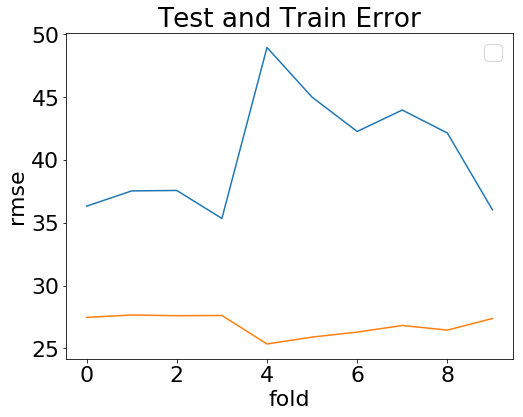

In [367]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(errors_test, label="Test")
ax.plot(errors_train, label = "Train")
ax.set_xlabel('fold')
ax.set_ylabel('rmse')
ax.set_title('Test and Train Error')
ax.legend(loc='best')

### Non-negative Lasso Regression

In [378]:
from sklearn.linear_model import Lasso
regr = Lasso(positive='True', alpha = 10)

In [379]:
errors_test=[]
errors_train=[]
for train_index, test_index in kf.split(X_arr):
    X_train, X_test = reconstructed[train_index], reconstructed[test_index]
    y_train, y_test = y_arr[train_index], y_arr[test_index]
    regr.fit(X_train,y_train)
    y_pred = regr.predict(X_test)
    y_train_pred = regr.predict(X_train)
    rms_test = np.sqrt(mean_squared_error(y_test, y_pred))
    rms_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    errors_test.append(rms_test)
    errors_train.append(rms_train)

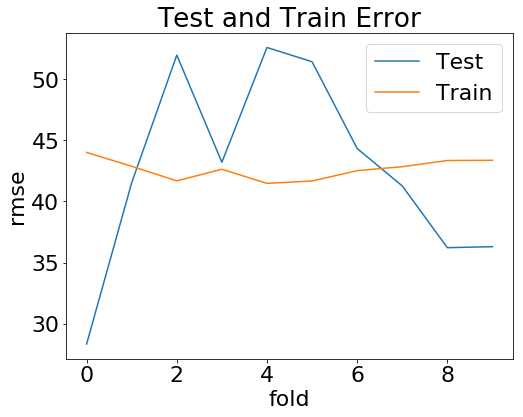

In [387]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(errors_test, label="Test")
ax.plot(errors_train, label = "Train")
ax.set_xlabel('fold')
ax.set_ylabel('rmse')
ax.set_title('Test and Train Error')
ax.legend(loc='best')